# ***Задача "Тексты писателей"***


Условие задачи

В этой задаче вам нужно по фрагменту текста научиться предсказывать писателя, который этот текст написал. Среди писателей — Федор Достоевский, Борис Акунин, Кир Булычев, Антон Чехов, Николай Гоголь, Стивен Кинг, Терри Пратчетт и Эрих Мария Ремарк. Все тексты на русском языке.

Входные данные

Тренировочная выборка train.csv представляет собой csv таблицу с тремя столбцами: • "id": уникальный id текста • "text": фрагмент текста произведения • "author": автор текста

Тестовая выборка test.csv представляет собой csv таблицу с двумя столбцами столбцами: "id"и "text". Ваша задача — для каждого текста из тестовой выборки предсказать автора этого текста.


Данные загружены на [гугл-диск](https://drive.google.com/drive/folders/1bINe7A2dmIKr_MxZ8kjVqJST4Dy_AajD?usp=sharing)

[Соревнование](https://contest.yandex.ru/contest/48061/problems/2/?success=95555681#67569/2022_04_01/s9pTsTbPvn) в системе яндекс-контест

## Считывание данных

Для удобства будем загружать данные с гугл-диска

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

path="/content/gdrive/MyDrive/Тексты писателей/"

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np

train=pd.read_csv(path+"train_texts.csv")
train

,id,text,author
0,0,-Бабушка!- вскричала малютка.- Возьми меня с с...,Dostoevsky
1,1,"Знал ли Скрудж об этом? Разумеется, знал. Да и...",Dostoevsky
2,2,"-С праздником, дядя, с радостью! Дай вам Бог в...",Dostoevsky
3,3,Мы высказали только главную передовую мысль на...,Dostoevsky
4,4,"I. Отдел литературный. Повести, романы, расска...",Dostoevsky
...,...,...,...
1729,1729,"-Хотелось бы мне, чтоб он был здесь.\nКанторек...",Remark
1730,1730,Но для нас в этом-то и заключается их несостоя...,Remark
1731,1731,"-Как дела, Франц?- спрашивает Кропп.\nКеммерих...",Remark
1732,1732,"Мюллер наклоняется:\n-Мы принесли твои вещи, Ф...",Remark


In [19]:
test=pd.read_csv(path+"test_texts.csv")
test

,id,text
0,1734,"Идти ему было немного; он даже знал, сколько ш..."
1,1735,"-Твой дедушка был немножко пиратом, а как увер..."
2,1736,"У меня был немецкий паспорт, годный еще на цел..."
3,1737,"-Ну как знаете,- сказал я и сделал вид, будто ..."
4,1738,Я отмахнулся.\n-На шестнадцать и пятьдесят одн...
...,...,...
325,2059,"-А правда,- сказал Маратик,- давай завтра еще ..."
326,2060,"Иванов (графу). Ax, не зуди ты, зуда! (Львову...."
327,2061,"Существо, которое называли Игорем, захлопнуло ..."
328,2062,"-Ма, вы с дядей Флавием дали мне образование, ..."


Обработаем категориальные значения в целевой переменной

In [20]:
authors=list(set(train["author"]))
authors

['Akunin',
 'Remark',
 'Gogol',
 'Bulychev',
 'Dostoevsky',
 'Pratchett',
 'King',
 'Chehov']

In [21]:
for i in range(len(authors)):
  train.loc[train["author"]==authors[i], 'author']=i
train

,id,text,author
0,0,-Бабушка!- вскричала малютка.- Возьми меня с с...,4
1,1,"Знал ли Скрудж об этом? Разумеется, знал. Да и...",4
2,2,"-С праздником, дядя, с радостью! Дай вам Бог в...",4
3,3,Мы высказали только главную передовую мысль на...,4
4,4,"I. Отдел литературный. Повести, романы, расска...",4
...,...,...,...
1729,1729,"-Хотелось бы мне, чтоб он был здесь.\nКанторек...",1
1730,1730,Но для нас в этом-то и заключается их несостоя...,1
1731,1731,"-Как дела, Франц?- спрашивает Кропп.\nКеммерих...",1
1732,1732,"Мюллер наклоняется:\n-Мы принесли твои вещи, Ф...",1


## Исследование данных

**Проверим баланс классов**

В задаче классификации данные называются несбалансированными (Imbalanced Data), если в обучающей выборке доли объектов разных классов существенно различаются, также говорят, что «классы не сбалансированы».

<BarContainer object of 8 artists>

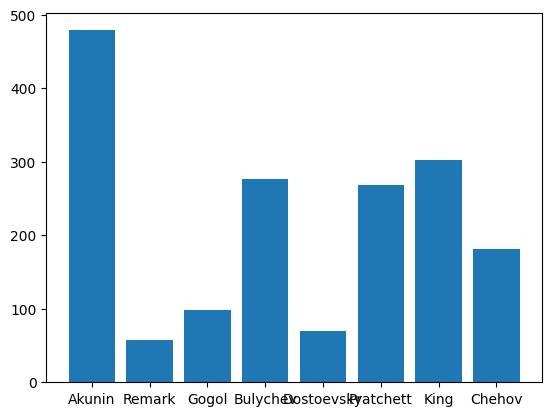

In [22]:
import matplotlib.pyplot as plt

groups = authors
counts = [len(train.loc[train["author"]==i]) for i in range(len(authors))]

plt.bar(groups, counts, width=0.8)

Рассмотрим распределение текстов по количеству предложений. Подобная информация о данных также может быть использована для классификации.

<Axes: >

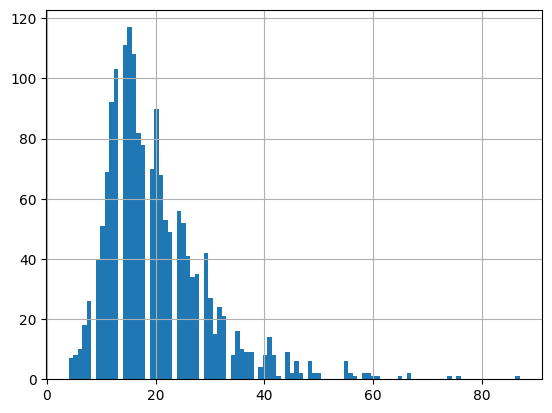

In [ ]:
seq_len = [len(str(i).split(".")) for i in train["text"]]
pd.Series(seq_len).hist(bins = 100)

<Axes: >

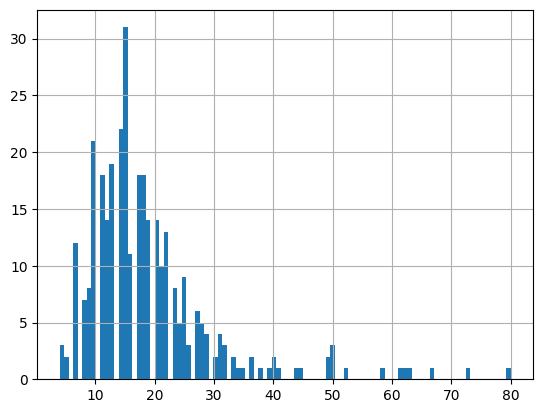

In [ ]:
seq_len = [len(str(i).split(".")) for i in test["text"]]
pd.Series(seq_len).hist(bins = 100)

Количество слов в текстах

<Axes: >

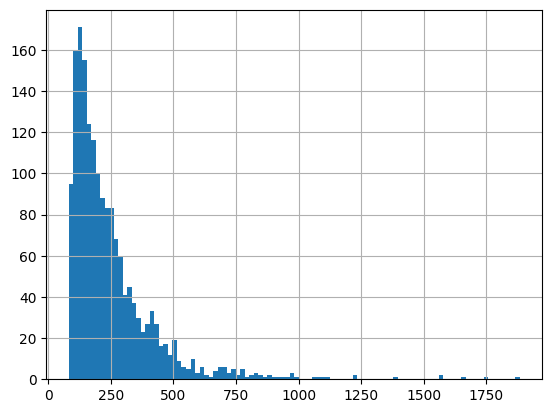

In [ ]:
seq_len = [len(str(i).split()) for i in train["text"]]
pd.Series(seq_len).hist(bins = 100)

<Axes: >

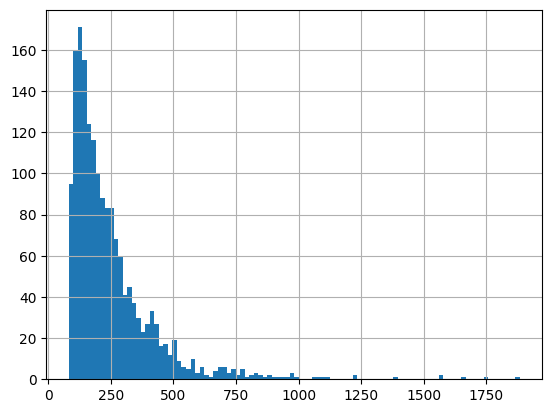

In [ ]:
seq_len = [len(str(i).split()) for i in train["text"]]
pd.Series(seq_len).hist(bins = 100)

Можно убрать из выборки для обучения короткие тексты, чтобы они не создавали шум (классифицировать короткие тексты, обычно, значительно сложнее)

In [ ]:
l = [len(i.split()) for i in train["text"]]
train.loc[:, "l"] = l
train=train.loc[train["l"]>=250]
train=train.dropna()
train=train.drop(columns=["l"])

<Axes: >

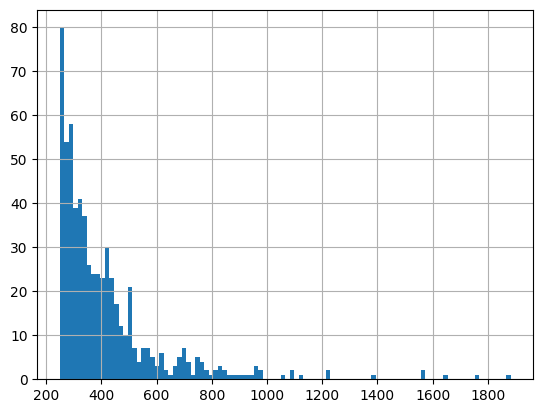

In [ ]:
seq_len = [len(str(i).split()) for i in train["text"]]
pd.Series(seq_len).hist(bins = 100)

Очень курстарный вариант борьбы с дисбалансом классов

In [ ]:
train1=train.copy()

train1=train1.append(train[train['author']==5])
train1=train1.append(train[train['author']==5])

train1=train1.append(train[train['author']==0])

train1=train1.append(train[train['author']==4])
train1=train1.append(train[train['author']==4])
train1=train1.append(train[train['author']==4])
train1=train1.append(train[train['author']==4])

train1=train1.append(train[train['author']==7])
train1=train1.append(train[train['author']==7])
train1=train1.append(train[train['author']==7])
train1=train1.append(train[train['author']==7])
train1=train1.append(train[train['author']==7])
train1=train1.append(train[train['author']==7])
train1=train1.append(train[train['author']==7])
train1=train1.append(train[train['author']==7])

train1=train1.append(train[train['author']==6])

train1=train1.append(train[train['author']==1])

train1=train1.append(train[train['author']==3])
train1=train1.append(train[train['author']==3])
train1=train1.append(train[train['author']==3])
train1=train1.append(train[train['author']==3])
train1=train1.append(train[train['author']==3])
train1=train1.append(train[train['author']==3])

<ipython-input-64-e0251826c2e4>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train1=train1.append(train[train['author']==5])
<ipython-input-64-e0251826c2e4>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train1=train1.append(train[train['author']==5])
<ipython-input-64-e0251826c2e4>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train1=train1.append(train[train['author']==0])
<ipython-input-64-e0251826c2e4>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train1=train1.append(train[train['author']==4])
<ipython-input-64-e0251826c2e4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

In [ ]:
train=train1

<BarContainer object of 8 artists>

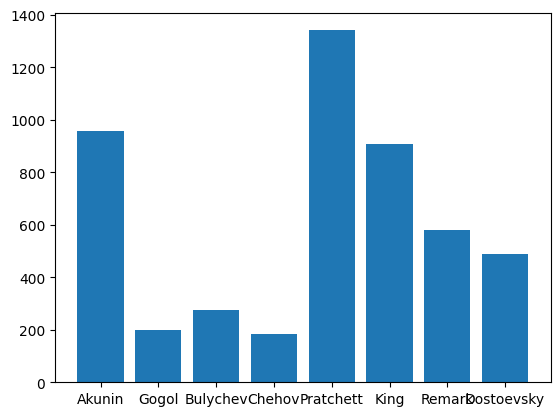

In [ ]:
groups = authors
counts = [len(train1.loc[train1["author"]==i]) for i in range(len(authors))]

plt.bar(groups, counts, width=0.8)

При работе с текстами знаки препинания обычно удаляются, чтобы немного "очистить" данные.

In [ ]:
punctuation_signs = list("?:!.,;")
for punct_sign in punctuation_signs:
    train['text'] = train['text'].str.replace(punct_sign, '')
    test['text'] = test['text'].str.replace(punct_sign, '')

<ipython-input-215-03ad3a5b4729>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train['text'] = train['text'].str.replace(punct_sign, '')
<ipython-input-215-03ad3a5b4729>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test['text'] = test['text'].str.replace(punct_sign, '')


Помимо удаления знаков препинания часто используется исключение всех неалфавитных символов

In [ ]:
import re

def del_s(df, col):
    text_list = []
    for row in range(len(df)):
        lemmatized_list = []
        text = df.iloc[row][col]
        text=re.sub("[^а-яА-Я]"," ",text)
        text_list.append(text)
    return text_list
train["text"]=del_s(train, "text")
test["text"]=del_s(test, "text")

## Эмбеддинги

Векторное представление слов (англ. word embedding) — общее название для различных подходов к моделированию языка и обучению представлений в обработке естественного языка, направленных на сопоставление словам из некоторого словаря векторов небольшой размерности.

Перемешаем данные для обучения

In [ ]:
from sklearn.utils import shuffle
train = shuffle(train)
train

,id,text,author
277,277,Брезгливо наморщив нос на прыснувших со стола ...,0
421,421,Это по вашему белые закричал он пассажир...,0
664,664,Не в том дело что наделал чего ответила ма...,2
1578,1578,Гроза рокоча и ворча обходила холмы на ногах...,4
693,693,Но англичане неожиданно высадившиеся под Ранг...,2
...,...,...,...
1209,1209,Ладно ладно гроши Но Кертис был убежден чт...,5
633,633,На конференции наш дорогой начальник сказал...,2
1076,1076,Записки сумасшедшего единственное произведе...,1
1138,1138,И к ее чести Марта не сказала ни слова Рей от...,5


***Токенизация*** - метод позволяющий разделить текст на так называемые токены, то есть на слова или предложения.

***Лемматизация*** - приведение словоформы к лемме — ее нормальной (словарной) форме. Другими словами, лемматизация схожа с выделением основы каждого слова в предложении. Она обычно выполняется простым поиском форм в таблице.

***Стемминг*** - это процесс обрезания конца или начала слов с целью удаления аффиксов (лексических дополнений к корню слова).

***Векторизация текста*** - преобразование текста в численную форму. Алгоритмы машинного обучения не умеют работать с текстом, поэтому необходимо превратить текст в цифры.

###Простейшие методы векторизации текстов


In [4]:
import nltk
import re

nltk.download("stopwords") # поддерживает удаление стоп-слов
nltk.download('punkt') # делит текст на список предложений
nltk.download('wordnet') # проводит лемматизацию
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Проведём лемматизацию текста

In [5]:
from nltk.corpus import stopwords
stop_=stopwords.words('russian')
def func(df, col):
    wordnet_lemmatizer = nltk.WordNetLemmatizer()
    lemmatized_text_list = []
    for row in range(len(df)):
        lemmatized_list = []
        text = df.iloc[row][col]
        text_words = text.split(" ")
        for word in text_words:
            word_norm = wordnet_lemmatizer.lemmatize(word)
            #if word_norm not in stop_:
            lemmatized_list.append(word_norm)
        lemmatized_text = " ".join(lemmatized_list)
        lemmatized_text_list.append(lemmatized_text)
    return lemmatized_text_list


train["text"] = func(train, "text")
test["text"] = func(test, "text")

In [6]:
all_data=pd.concat([train, test])

In [7]:
all_data

,id,text,author
0,0,-Бабушка!- вскричала малютка.- Возьми меня с с...,Dostoevsky
1,1,"Знал ли Скрудж об этом? Разумеется, знал. Да и...",Dostoevsky
2,2,"-С праздником, дядя, с радостью! Дай вам Бог в...",Dostoevsky
3,3,Мы высказали только главную передовую мысль на...,Dostoevsky
4,4,"I. Отдел литературный. Повести, романы, расска...",Dostoevsky
...,...,...,...
325,2059,"-А правда,- сказал Маратик,- давай завтра еще ...",NaN
326,2060,"Иванов (графу). Ax, не зуди ты, зуда! (Львову....",NaN
327,2061,"Существо, которое называли Игорем, захлопнуло ...",NaN
328,2062,"-Ма, вы с дядей Флавием дали мне образование, ...",NaN


CountVectorizer - простейший метод векторизации текста, основанный на представлении его с помощью "мешка слов"

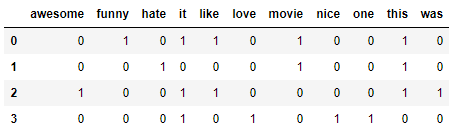

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer( max_features = 50)
matrix = count.fit_transform(all_data["text"]).toarray()

TfidfVectorizer - более совершенный метод векторизации. В нём учитывается "вес" каждого слова, основанный на том, как часто слово встречается

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=10000)
matrix = tfidf.fit_transform(all_data["text"]).toarray()

In [26]:
matrix[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [28]:
train_matrix=matrix[:len(train)]
test_matrix=matrix=matrix[:-len(train)]
y=train["author"].to_numpy().astype("int")

In [30]:
y

array([4, 4, 4, ..., 1, 1, 1])

### Word2Vec

Word2Vec - один из самых популярных методов векторизации текстов, позволяющий учитывать контекст. Алгоритм основан основан на важной гипотезе, которую в науке принято называть гипотезой локальности — “слова, которые встречаются в одинаковых окружениях, имеют близкие значения”.

Одним из главных достоинств Word2Vec является то, что данный алгоритм позволяет при работе с текстами учитывать контекст.

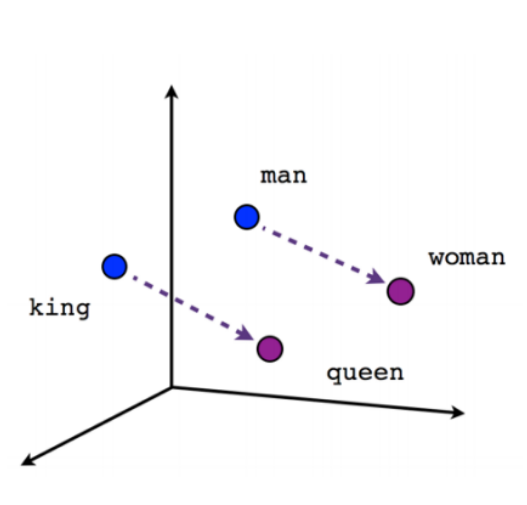

In [ ]:
import nltk
import re

nltk.download("stopwords") # поддерживает удаление стоп-слов
nltk.download('punkt') # делит текст на список предложений
nltk.download('wordnet') # проводит лемматизацию
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Проведём токенизацию и лемматизацию текстов

In [ ]:
from nltk.corpus import stopwords
stop_=stopwords.words('russian')
def func(df, col):
    wordnet_lemmatizer = nltk.WordNetLemmatizer()
    lemmatized_text_list = []
    for row in range(len(df)):
        lemmatized_list = []
        text = df.iloc[row][col]
        text_words = text.split(" ")
        for word in text_words:
            word_norm = wordnet_lemmatizer.lemmatize(word)
            #if word_norm not in stop_:
            lemmatized_list.append(word_norm)
        lemmatized_text_list.append(lemmatized_list)
    return lemmatized_text_list


train["text"] = func(train, "text")
test["text"] = func(test, "text")

In [ ]:
from gensim.models import word2vec

model = word2vec.Word2Vec(all_data["text"], vector_size=1000)
#создадим словарь со словами и соответсвующими им векторами
w2v = dict(zip(model.wv.index_to_key, model.wv.vectors))

Каждое слово - вектор, а текст - среднее векторов, соответствутющих словам

In [ ]:
class mean_vectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.dim = len(next(iter(w2v.values())))

    def fit(self, X):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])


In [ ]:
train_matrix=mean_vectorizer(w2v).fit(train['text']).transform(train['text'])
train_matrix.shape

(1734, 1000)

In [ ]:
test_matrix=mean_vectorizer(w2v).fit(test['text']).transform(test['text'])
y=train["author"].to_numpy().astype("int")

А это уже более совершенный метод борьбы с дисбалансом классов

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
train_matrix, y = oversample.fit_resample(train_matrix, train["author"].to_numpy().astype("int"))

## Обучение модели

Будем использовать логистическую регресиию.

Про другие алгоритмы классификаии в библиотеке sklearn можно прочитать [здесь](https://tproger.ru/translations/scikit-learn-in-python/), а также в [документации sklearn](https://scikit-learn.ru/category/supervised_learning/).

In [31]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
model=LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X=train_matrix, y=y)

LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X=train_matrix, y=y)

GaussianNB()

In [32]:
import sklearn
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_pred=model.predict(train_matrix)
y_true=y


In [33]:
print(sklearn.metrics.accuracy_score(y_true, y_pred))

0.9302191464821222


Готовим результат для отправки

In [ ]:
res=model.predict(test_matrix)

In [ ]:
authors

['Akunin',
 'Gogol',
 'Bulychev',
 'Chehov',
 'Pratchett',
 'King',
 'Remark',
 'Dostoevsky']

In [ ]:
res1=[]
for i in range(len(res)):
  res1.append(authors[res[i]])

In [ ]:
output=test.drop(columns=["text"])
output.loc[:, "author"] = res1
output

,id,author
0,1734,Akunin
1,1735,Akunin
2,1736,Bulychev
3,1737,Pratchett
4,1738,Bulychev
...,...,...
325,2059,Pratchett
326,2060,Chehov
327,2061,Akunin
328,2062,King


In [ ]:
from google.colab import files
output.to_csv("solution.csv", index=False)

files.download("solution.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Autokeras

Autokeras - библиотека, предоставляющая очень высокий уровень абстракции при работе с различными типами данных. Это бывает, когда нужно за короткое время решить задачу, не разбираясь с методами работы с нужным типом данных

In [ ]:
!pip install autokeras

In [ ]:
import os

import numpy as np
import tensorflow as tf

import autokeras as ak

Using TensorFlow backend


In [ ]:
from sklearn.utils import shuffle
train = shuffle(train)
train = shuffle(train)
train = shuffle(train)
train = shuffle(train)
train = shuffle(train)
train = shuffle(train)
train = shuffle(train)

In [ ]:
# Initialize the text classifier.
clf = ak.TextClassifier(
    overwrite=False, max_trials=1
)  # It only tries 1 model as a quick demo.
# Feed the text classifier with training data.
clf.fit(train["text"].to_numpy(), train["author"].to_numpy(), epochs=15)
# Predict with the best model.
predicted_y = clf.predict(test["text"].to_numpy())


Reloading Tuner from ./text_classifier/tuner0.json
Epoch 1/15
55/55 [==============================] - 13s 220ms/step - loss: 1.9163 - accuracy: 0.2687
Epoch 2/15
55/55 [==============================] - 11s 200ms/step - loss: 1.8885 - accuracy: 0.2630
Epoch 3/15
55/55 [==============================] - 12s 226ms/step - loss: 1.8553 - accuracy: 0.2774
Epoch 4/15
55/55 [==============================] - 11s 202ms/step - loss: 1.7156 - accuracy: 0.3679
Epoch 5/15
55/55 [==============================] - 13s 232ms/step - loss: 1.2307 - accuracy: 0.5917
Epoch 6/15
55/55 [==============================] - 11s 194ms/step - loss: 0.7911 - accuracy: 0.7295
Epoch 7/15
55/55 [==============================] - 13s 229ms/step - loss: 0.5352 - accuracy: 0.8206
Epoch 8/15
55/55 [==============================] - 11s 198ms/step - loss: 0.3572 - accuracy: 0.8800
Epoch 9/15
55/55 [==============================] - 12s 211ms/step - loss: 0.2535 - accuracy: 0.9187
Epoch 10/15
55/55 [=====================

In [ ]:
output=test.drop(columns=["text"])
output.loc[:, "author"] = res1
output

In [ ]:
from google.colab import files
output.to_csv("solution.csv", index=False)

files.download("solution.csv")